The Model parameters are:[6.43234991 0.80954036]
Intercept:467.3445829012643
The predicted values for the test_csv are: [ 488.30468628 1445.76533622  689.45853301  632.86062651 1077.23847301
 1344.61676464  579.16712538 1495.5171089  1410.99907384 1521.92413008
  704.83979978 1400.65094097 1442.57114773 1512.84329441  976.24776574
  788.17848352  862.04057513  829.17525856 1118.04132884 1125.7229485
 1100.40733276 1402.8157244   931.00145167  897.57240492 1214.35068573
 1489.30462369 1511.57599721  752.47076197 1122.94254392 1298.82474786]
The mean square error for the model are: 0.6091991650759796
The response variable for the given sample features [46,53] are: [806.13831763]


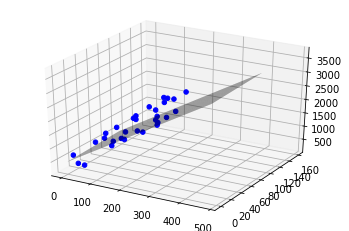

In [10]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets, linear_model, metrics


# In[2]:


df_train1 = pd.read_csv("PB1_train.csv",header = None)
df_test1 = pd.read_csv("PB1_test.csv",header = None)


# In[3]:


df_train1_features = df_train1.iloc[:,[0,1]]
df_train1_response = df_train1.iloc[:,-1]
df_train1_response.head()


# In[4]:


reg = linear_model.LinearRegression()
reg.fit(df_train1_features,df_train1_response)
print("The Model parameters are:{}".format(reg.coef_))
print("Intercept:{}".format(reg.intercept_))


# In[5]:


df_test1_features = df_test1.iloc[:,[0,1]]
df_test1_response = df_test1.iloc[:,-1]


# In[9]:


predicted_values = reg.predict(df_test1_features)
print("The predicted values for the test_csv are: {}".format(predicted_values))


# In[10]:


mean_sqr_error = reg.score(df_test1_features,df_test1_response)
print("The mean square error for the model are: {}".format(mean_sqr_error))


# In[52]:


X = np.array([46,53])
X.reshape(1,-1)
sample_predict = reg.predict([X])
print("The response variable for the given sample features [46,53] are: {}".format(sample_predict))


# In[54]:


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

X= df_test1_features.iloc[:,0].tolist() 
Y= df_test1_features.iloc[:,1].tolist()
Z= df_test1_response[:].tolist()
x_surf = np.arange(0, 500, 20)                # generate a mesh
y_surf = np.arange(0,100, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
# print(x_surf,y_surf)
exog = pd.DataFrame({1: x_surf.ravel(), 2: y_surf.ravel()})
out = reg.predict(exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(X,Y,Z, c='blue', marker='o',alpha=1)
plt.show()